# Train the distance dataset to see if the model can distinguish real detector data!

In [1]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from keras.callbacks import EarlyStopping
from tqdm import tqdm

# functions from other notebooks
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.models import classifier
# from ipynb.fs.full.generate_data import convert, visualize

Using TensorFlow backend.


Firstly, note that data has mass range: 10-100 (for m1 and m2), and distance range: 100-2000 Mpc 

This distance range is equivalent to SNR 7-1000 ish

# Data

In [2]:
# load data
f_path = 'c_distance_testdata.h5'
X = pd.read_hdf(f_path, 'X')
y = pd.read_hdf(f_path, 'y')

In [7]:
# Data preprocessing

# uniformly scale data
X_scaled=X*(10**22)

In [4]:
# Train test split with sklearn
Xtrain,Xtest,ytrain,ytest = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

In [9]:
# Reshape data
X_train = []
for i in np.arange(len(Xtrain)):
    h = Xtrain[i].reshape(4096,1)
    X_train.append(h)
X_train = np.asarray(X_train)

X_test = []
for i in np.arange(len(Xtest)):
    h = Xtest[i].reshape(4096,1)
    X_test.append(h)
X_test = np.asarray(X_test)

# one hot code y
y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

# Distribution of prediction

In [10]:
# Check model performance accuracy before
model = load_model('classify4.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


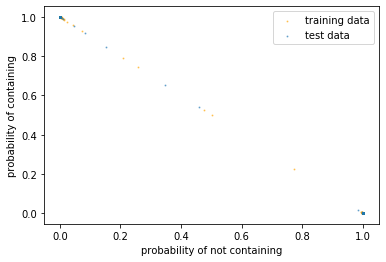

In [16]:
result_test = model.predict(X_test)
neg1 = result_test[0:,0] #first column
pos1 = result_test[0:,1] #second column

result_train = model.predict(X_train)
neg2 = result_train[0:,0] #first column
pos2 = result_train[0:,1] #second column

plt.scatter(neg2, pos2, s=1, color = 'orange',alpha=0.5, label = 'training data')
plt.scatter(neg1, pos1, s=1, alpha=0.5, label = 'test data')

plt.xlabel("probability of not containing")
plt.ylabel("probability of containing")
plt.legend(loc='upper right')
plt.show()

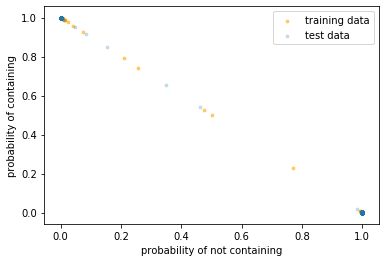

In [21]:
plt.scatter(neg2, pos2, s=8, color = 'orange',alpha=0.5, label = 'training data')
plt.scatter(neg1, pos1, s=8, alpha=0.2, label = 'test data')

plt.xlabel("probability of not containing")
plt.ylabel("probability of containing")
plt.legend(loc='upper right')
plt.show()

In [22]:
# find wrong predictions in test set

false_negative = 0
fn_index = []
fp_index = []
for i in tqdm(range(len(pos1))):
    if pos1[i] < 0.5 and ytest[i][0]==1:
        false_negative += 1
        fn_index.append(i)
        
print("False negative: ", false_negative)

false_positive = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] > 0.5 and ytest[i][0]==0:
        false_positive += 1
        fp_index.append(i)
        
print("False positive: ", false_positive)

100%|██████████| 3000/3000 [00:00<00:00, 191973.64it/s]


False negative:  2


100%|██████████| 3000/3000 [00:00<?, ?it/s]


False positive:  0


In [23]:
print(fn_index)

[271, 2619]


In [14]:
# find the ones that the model is unsure of

uncertain_count = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] > 0.4 and pos1[i] < 0.6:
        uncertain_count += 1

print("uncertained: ", uncertain_count)

100%|██████████| 3000/3000 [00:00<00:00, 191116.39it/s]


uncertained:  1


In [17]:
# find wrong predictions in training set
fn_index = []
fp_index = []

false_negative_train = 0
for i in tqdm(range(len(pos2))):
    if pos2[i] < 0.5 and ytrain[i][0]==1:
        false_negative_train += 1
        fn_index.append(i)
        
print("False negative: ", false_negative_train)


false_positive_train = 0
for i in tqdm(range(len(pos2))):
    if pos2[i] > 0.5 and ytrain[i][0]==0:
        false_positive_train += 1
        fp_index.append(i)
        
print("False positive: ", false_positive_train)

100%|██████████| 26999/26999 [00:00<00:00, 431998.83it/s]


False negative:  4


100%|██████████| 26999/26999 [00:00<00:00, 382879.64it/s]


False positive:  11


In [ ]:
print(fn_index,fp_index)

In [5]:
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.generate_data import convert, visualize

import pylab

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [14]:
fn_test =[271, 2619]
fn_train = [22137, 23541, 25462, 26870] 
fp_train = [990, 1148, 3257, 4914, 11601, 16412, 21050, 23495, 25340, 26285, 26414]


No handles with labels found to put in legend.


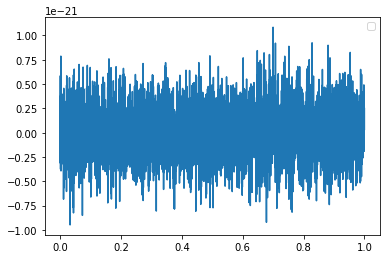

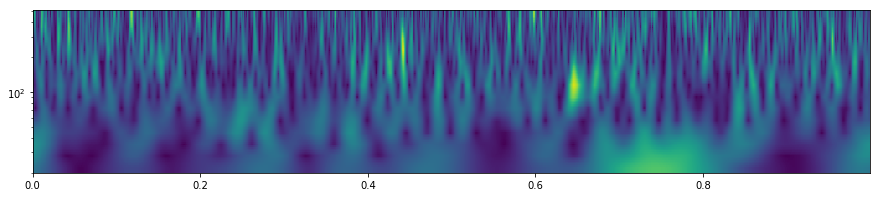

No handles with labels found to put in legend.


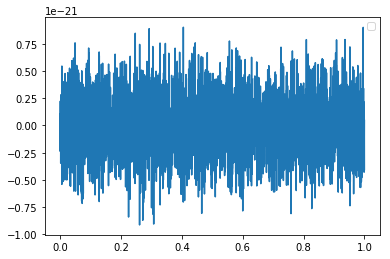

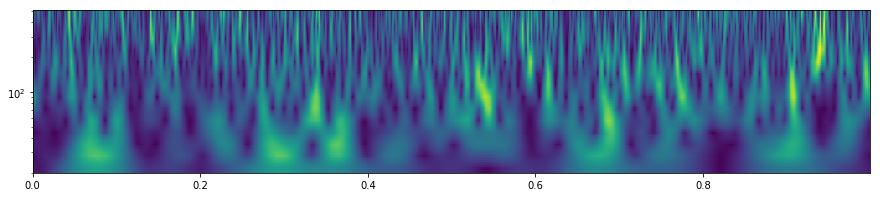

In [15]:
for i in fn_test:
    falpos_wf = convert(Xtest[i])
    pylab.plot(falpos_wf.sample_times, falpos_wf )
    pylab.legend()
    pylab.show()
    visualize(falpos_wf)

No handles with labels found to put in legend.


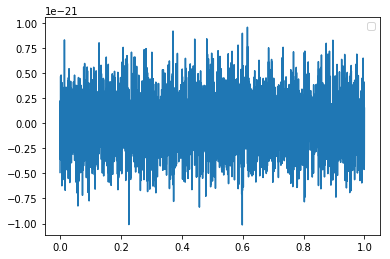

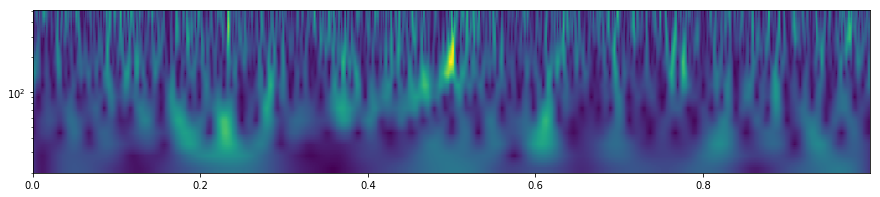

No handles with labels found to put in legend.


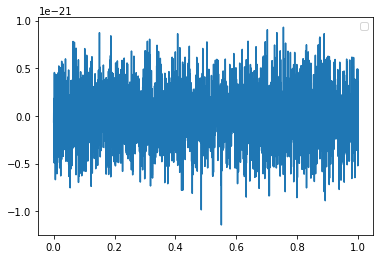

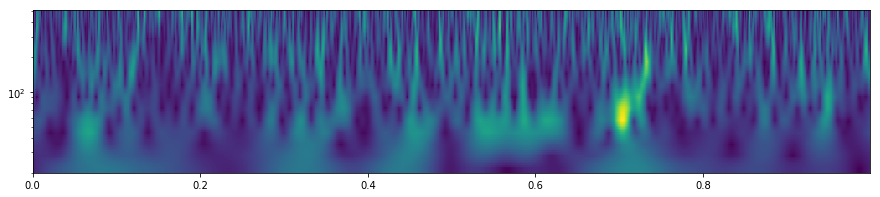

No handles with labels found to put in legend.


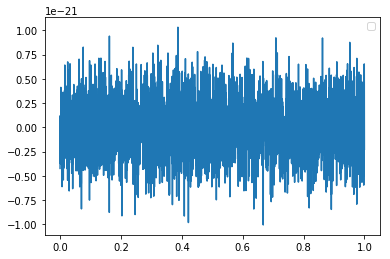

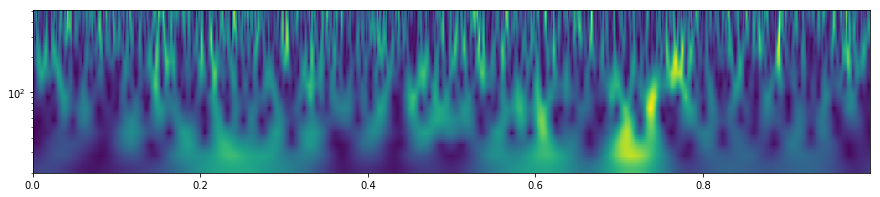

No handles with labels found to put in legend.


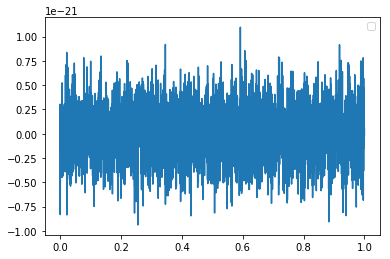

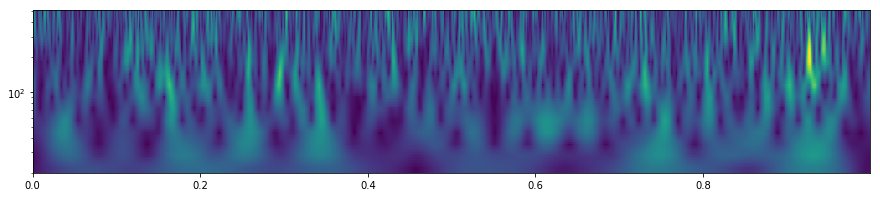

In [16]:
for i in fn_train:
    falpos_wf = convert(Xtrain[i])
    pylab.plot(falpos_wf.sample_times, falpos_wf )
    pylab.legend()
    pylab.show()
    visualize(falpos_wf)

No handles with labels found to put in legend.


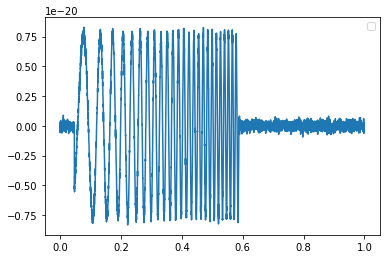

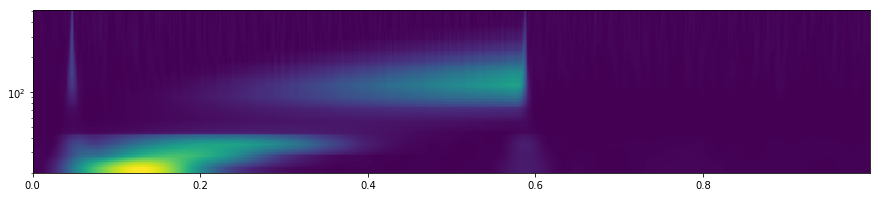

No handles with labels found to put in legend.


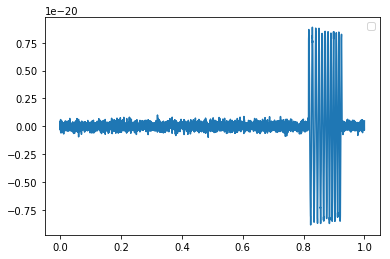

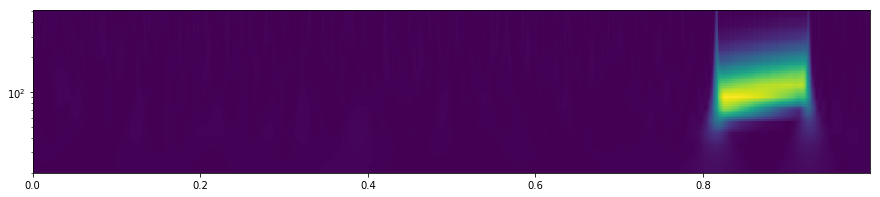

No handles with labels found to put in legend.


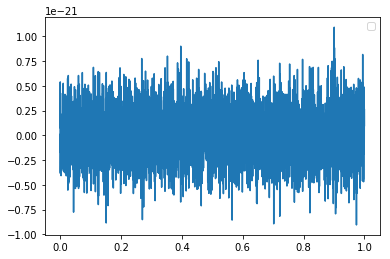

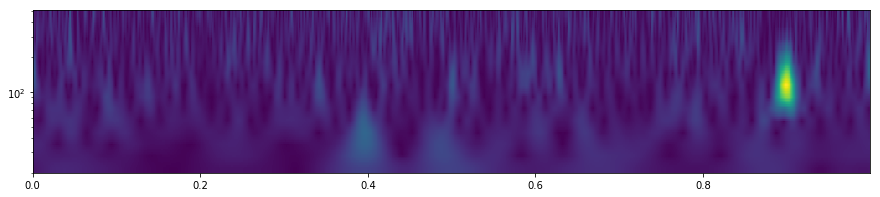

No handles with labels found to put in legend.


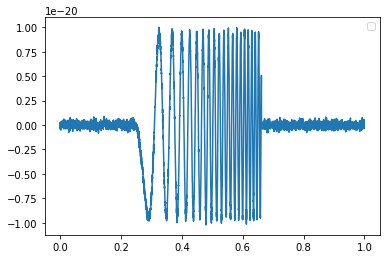

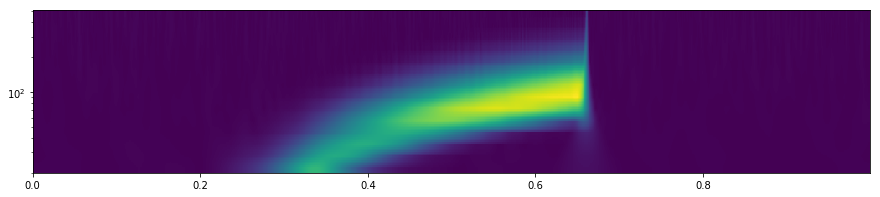

No handles with labels found to put in legend.


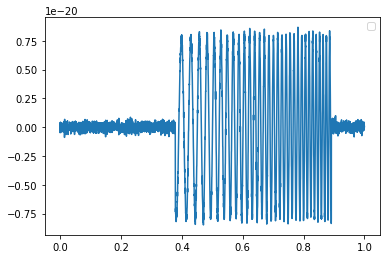

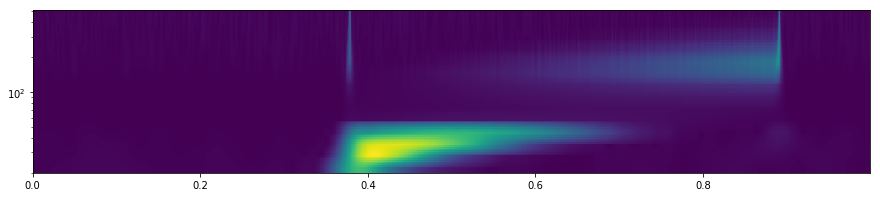

No handles with labels found to put in legend.


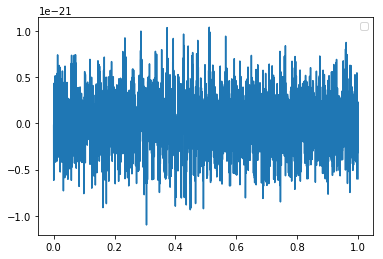

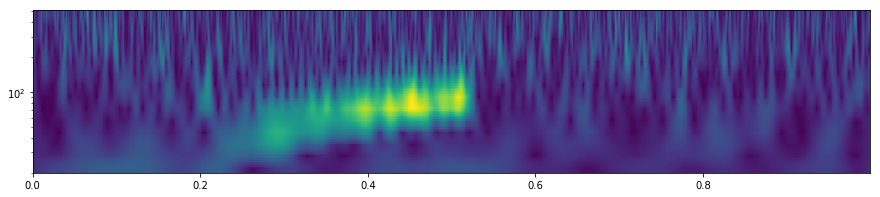

No handles with labels found to put in legend.


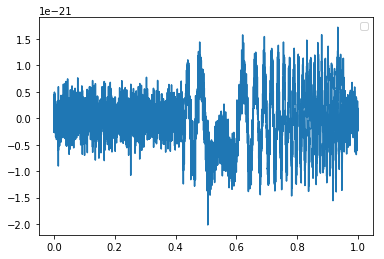

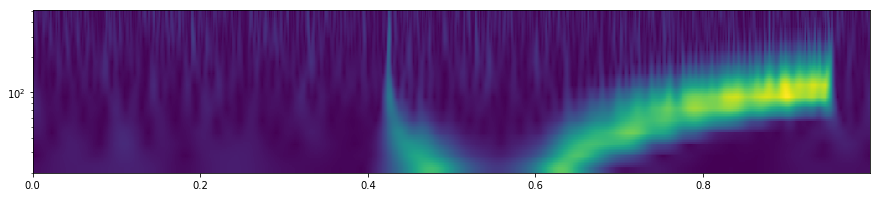

No handles with labels found to put in legend.


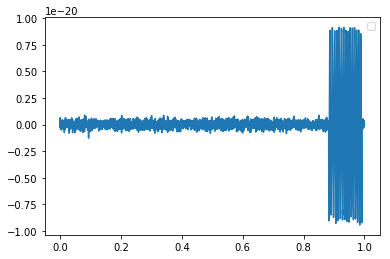

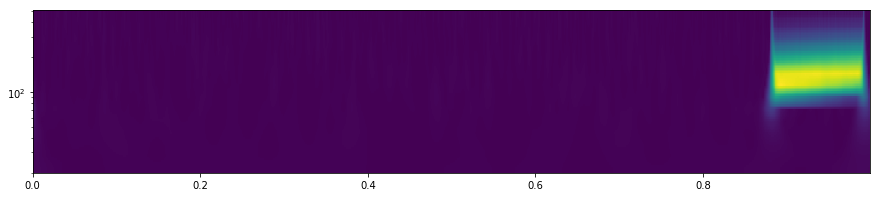

No handles with labels found to put in legend.


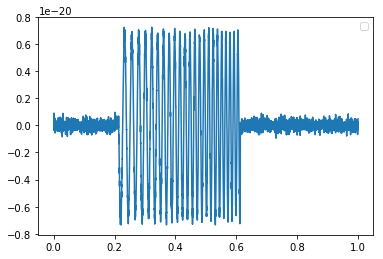

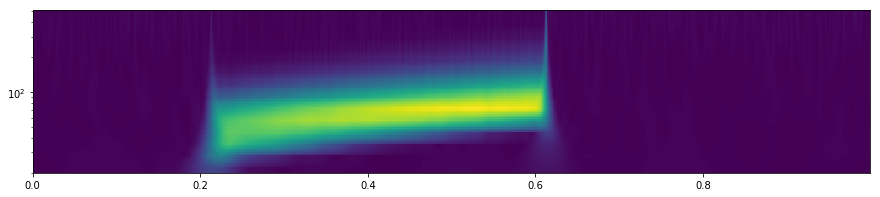

No handles with labels found to put in legend.


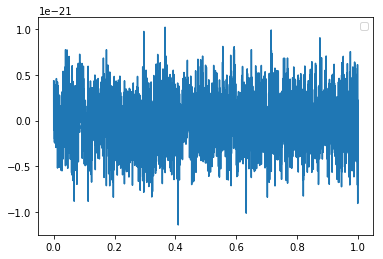

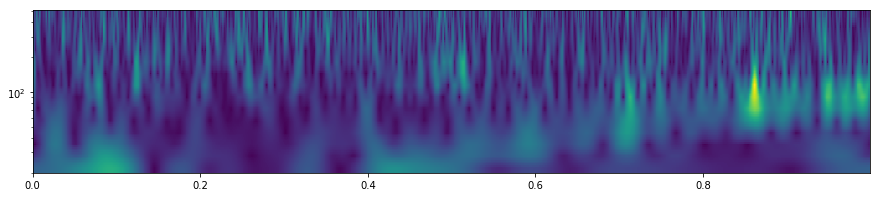

No handles with labels found to put in legend.


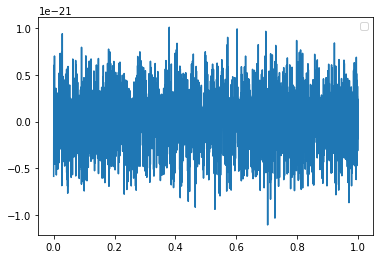

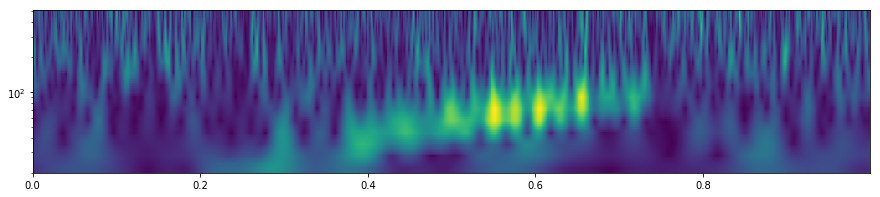

In [17]:
for i in fp_train:
    falpos_wf = convert(Xtrain[i])
    pylab.plot(falpos_wf.sample_times, falpos_wf )
    pylab.legend()
    pylab.show()
    visualize(falpos_wf)

No handles with labels found to put in legend.


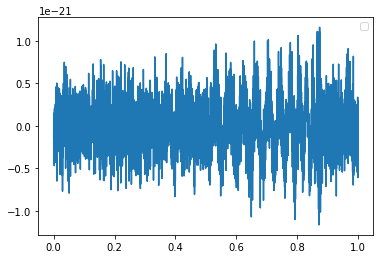

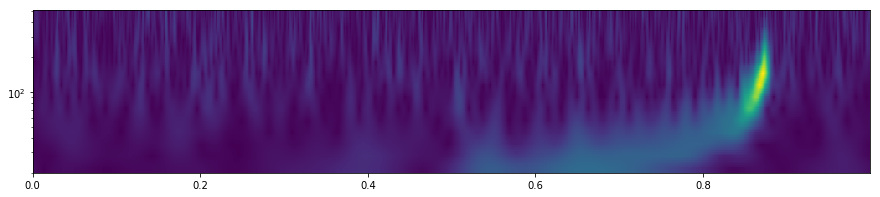

In [19]:
i=2
falpos_wf = convert(Xtrain[i])
pylab.plot(falpos_wf.sample_times, falpos_wf )
pylab.legend()
pylab.show()
visualize(falpos_wf)